In [26]:
import pandas as pd
from scipy.spatial import cKDTree
import numpy as np
data=pd.read_csv('C:\\Users\\stalo\\Documents\\ZAMFARA_crosschecked.csv')
pd.set_option('display.max_rows',70)
data
#data['Ward'].count()=70
#data['APC'][data['Ward']]
#data['PDP'].sum()=8218
#data['LP'].sum()=34
#data['NNPP'].sum()=156

#data['Ward'].value_counts()

data['LGA'].value_counts()
data['LGA'].info()








<class 'pandas.core.series.Series'>
RangeIndex: 71 entries, 0 to 70
Series name: LGA
Non-Null Count  Dtype 
--------------  ----- 
70 non-null     object
dtypes: object(1)
memory usage: 700.0+ bytes


In [127]:
#Find Neighbors

coords=np.array(list(zip(data.Longitude, data.Latitude)))
tree=cKDTree(coords)

def find_neighbors(idx,radius):
    distances,indices=tree.query(coords[idx],k=len(coords),distance_upper_bound=radius)
    return indices[distances != np.inf]

radius=0.5
data['Neighbors']=data.index.map(lambda idx: find_neighbors(idx, radius))


find_neighbors(53,radius)

array([53,  0, 35,  9], dtype=int64)

In [103]:
#calculate Outlier score



def calculate_outlier_scores(row, party_column):
    neighbor_indices=row['Neighbors']
    neighbor_indices=neighbor_indices[neighbor_indices != row.name]
    neighbor_votes=data.loc[neighbor_indices,party_column]
    
    mean_votes= neighbor_votes.mean()
    std_votes=neighbor_votes.std()
    
    
    outlier_score=(row[party_column]-mean_votes)/std_votes if std_votes > 0 else 0
    
    return outlier_score

data['APC_Outlier_Score']=data.apply(calculate_outlier_scores,axis=1,party_column='APC')
data['LP_Outlier_Score']=data.apply(calculate_outlier_scores,axis=1,party_column='LP')
data['PDP_Outlier_Score']=data.apply(calculate_outlier_scores,axis=1,party_column='PDP')
data['NNPP_Outlier_Score']=data.apply(calculate_outlier_scores,axis=1,party_column='NNPP')










    

In [115]:
data['APC_Outlier_Score']


0    -0.357731
1     0.662586
2     0.887197
3     4.700070
4     0.000000
5     1.720360
6    -0.684735
7     1.847354
8     0.000000
9    -2.452770
10   -0.556351
11    0.000000
12    0.000000
13   -0.839088
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19   -0.607159
20   -0.105660
21    0.000000
22    0.000000
23   -1.100750
24    2.618206
25    0.000000
26    0.815892
27   -0.898839
28    0.000000
29    0.000000
30    0.000000
31    0.000000
32    0.000000
33   -1.753625
34   -0.418941
35    1.937203
36    0.000000
37    2.383673
38    0.034895
39   -0.789610
40    0.000000
41    0.065040
42    0.290617
43   -0.717223
44   -0.495902
45    1.898580
46    0.072520
47    0.175403
48   -0.917892
49   -0.888047
50   -1.038331
51    0.143492
52    0.000000
53    0.647389
54    0.518545
55   -9.899495
56   -0.872706
57    1.291252
58    1.509809
59   -0.498681
60   -0.938739
61   -0.888998
62   -0.304200
63   -1.490703
64    0.411028
65   -0.650706
66   -0.32

In [122]:
data['LP_Outlier_Score']


0     0.000000
1     0.000000
2    -0.577350
3     0.000000
4     0.000000
5     0.000000
6    -0.503953
7    -0.410259
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19   -0.356027
20    0.000000
21    0.000000
22    0.000000
23   -0.356027
24    0.000000
25    0.000000
26   -0.707107
27   -0.500000
28    0.000000
29    0.000000
30    0.000000
31    0.000000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    3.550235
38   -0.424437
39    0.000000
40    0.000000
41   -0.333333
42   -0.333333
43   -0.333333
44   -0.242536
45   -0.229416
46   -0.229416
47   -0.277350
48   -0.277350
49   -0.229416
50    0.791559
51   -0.365148
52    0.000000
53    0.000000
54   -0.707107
55   -0.707107
56   -0.356027
57   -0.356027
58   -0.365148
59   -0.356027
60   -0.365148
61    0.000000
62    0.000000
63   -0.424437
64   -0.424437
65    0.000000
66   -0.44

In [121]:
data['PDP_Outlier_Score']


0     -0.240551
1      0.588800
2      0.295389
3     -0.242923
4      0.000000
5      0.378370
6      0.440900
7      0.288566
8      0.000000
9     -1.506803
10     1.782335
11     0.000000
12     0.000000
13    -0.226599
14     0.000000
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19    -0.307272
20     0.754247
21     0.000000
22     0.000000
23    -0.768553
24     0.661487
25     0.000000
26    -0.135982
27     3.746742
28     0.000000
29     0.000000
30     0.000000
31     0.000000
32     0.000000
33   -43.133514
34    -1.374264
35    -0.989180
36     0.000000
37    -0.330878
38    -0.330878
39     3.929988
40     0.000000
41     0.769068
42    -0.966423
43    -1.103222
44    -0.731684
45    -0.205326
46     3.655689
47    -0.165993
48    -0.165471
49     1.348562
50     2.638142
51    -0.824506
52     0.000000
53     8.320158
54     0.207973
55     1.478496
56    -0.591693
57    -0.125479
58     0.208980
59    -0.631147
60    -0.342567
61    -0.923918
62    -0

In [116]:
data['NNPP_Outlier_Score']


0     0.721688
1     0.000000
2     0.000000
3    -0.377964
4     0.000000
5     3.681432
6    -0.333333
7    -0.449089
8     0.000000
9    -0.848875
10   -0.500000
11    0.000000
12    0.000000
13   -1.144344
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19   -0.560278
20    0.000000
21    0.000000
22    0.000000
23   -0.560278
24    0.000000
25    0.000000
26   -0.707107
27    2.598076
28    0.000000
29    0.000000
30    0.000000
31    0.000000
32    0.000000
33    0.000000
34   -0.288675
35   -1.443376
36    0.000000
37   -0.465130
38    2.561738
39   -0.585540
40    0.000000
41   -0.769042
42   -0.172133
43    0.404651
44    1.668787
45    0.859153
46    2.961258
47   -0.998460
48    0.540475
49   -0.774597
50    0.328161
51   -0.577350
52    0.000000
53    1.732051
54   -0.707107
55   -0.707107
56   -0.495434
57   -0.495434
58    0.635927
59   -0.495434
60   -0.438061
61   -0.316228
62   -0.316228
63   -0.465130
64   -0.465130
65   -1.224745
66    0.44

In [105]:
#identify outliers

threshold=1
data['APC_Outlier']=data['APC_Outlier_Score'].abs() > threshold

data['LP_Outlier']=data['LP_Outlier_Score'].abs() > threshold

data['PDP_Outlier']=data['PDP_Outlier_Score'].abs() > threshold

data['NNPP_Outlier']=data['NNPP_Outlier_Score'].abs() > threshold


In [124]:
data[data['APC_Outlier']]


,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Longitude,Neighbors,APC_Outlier_Score,LP_Outlier_Score,PDP_Outlier_Score,NNPP_Outlier_Score,APC_Outlier,LP_Outlier,PDP_Outlier,NNPP_Outlier
3,ZAMFARA,BAKURA,DAMRI,36-02-03-001,DAMRI I/MODEL PRIMARY SCHOOL,551,1289,True,-1,True,...,5.838036,"[3, 39, 1, 61, 62, 66, 10, 34]",4.700070,0.000000,-0.242923,-0.377964,True,False,False,False
5,ZAMFARA,BAKURA,DAN MANAU,36-02-05-005,DAN MANAU / MODEL PRI SCH.,220,989,True,-1,True,...,7.129709,"[5, 54, 55, 43, 42, 41]",1.720360,0.000000,0.378370,3.681432,True,False,False,True
7,ZAMFARA,BIRNIN MAGAJI,GORA,36-03-03-011,MADAMBAJI / GARKAR HAKIMI,49,134,True,-1,True,...,6.728350,"[7, 69, 37, 67, 64, 63, 38, 23, 19, 59, 60, 56...",1.847354,-0.410259,0.288566,-0.449089,True,False,False,False
9,ZAMFARA,BUKKUYUM,ADABKA,36-04-01-013,KATAFANA / DAN FAGE,41,641,True,-1,True,...,5.579454,"[9, 10, 0, 53, 2]",-2.452770,0.000000,-1.506803,-0.848875,True,False,True,False
23,ZAMFARA,BUNGUDU,TOFA,36-05-11-010,WAZOJI / PRIMARY SCHOOL,39,718,True,-1,False,...,6.733219,"[23, 19, 51, 50, 59, 56, 57, 60, 69, 58, 7, 37...",-1.100750,-0.356027,-0.768553,-0.560278,True,False,False,False
24,ZAMFARA,GUMMI,BIRNIN MAGAJI,36-06-02-006,KALI / KALI KASUWA,232,675,True,-1,True,...,7.712431,"[24, 33, 20]",2.618206,0.000000,0.661487,0.000000,True,False,False,False
33,ZAMFARA,MARADUN,JANBAKO,36-09-06-007,UNG. MAIJATAU / KOGON MAI JATAU,84,464,True,-1,True,...,7.451045,"[33, 20, 24]",-1.753625,0.000000,-43.133514,0.000000,True,False,True,False
35,ZAMFARA,MARADUN,MARADUN SOUTH,36-09-09-007,TUNGAR MAGAJI / PRIMARY SCHOOL AREA,167,540,True,-1,False,...,6.366772,"[35, 13, 53, 0, 44]",1.937203,0.000000,-0.989180,-1.443376,True,False,False,True
37,ZAMFARA,TALATA MAFARA,GWARAM,36-12-02-002,MORAWA / MAKARANTA,301,804,True,-1,True,...,6.811369,"[37, 67, 64, 63, 38, 7, 69, 6, 23, 19, 59, 60,...",2.383673,3.550235,-0.330878,-0.465130,True,True,False,False
45,ZAMFARA,TSAFE,"YANKUZO ""A""",36-13-04-005,TAKULAWA / PRIMARY SCHOOL,238,916,True,-1,True,...,6.920633,"[45, 46, 49, 47, 48, 44, 41, 42, 43, 51, 19, 5...",1.898580,-0.229416,-0.205326,0.859153,True,False,False,False


In [108]:
data[data['LP_Outlier']]


,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Longitude,Neighbors,APC_Outlier_Score,LP_Outlier_Score,PDP_Outlier_Score,NNPP_Outlier_Score,APC_Outlier,LP_Outlier,PDP_Outlier,NNPP_Outlier
37,ZAMFARA,TALATA MAFARA,GWARAM,36-12-02-002,MORAWA / MAKARANTA,301,804,True,-1,True,...,6.811369,"[37, 67, 64, 63, 38, 7, 69, 6, 23, 19, 59, 60,...",2.383673,3.550235,-0.330878,-0.46513,True,True,False,False
67,ZAMFARA,TALATA MAFARA,SHIYAR GALADIMA,36-12-09-044,DAN JALLABA III/ UNGUWAR ROGO/ BAKIN TRANSFORMER,190,745,True,-1,True,...,6.812878,"[67, 64, 63, 37, 38, 7, 69, 6, 23, 19, 59, 60,...",0.176919,3.550235,-0.112094,-0.46513,False,True,False,False


In [109]:
data[data['PDP_Outlier']]


,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Longitude,Neighbors,APC_Outlier_Score,LP_Outlier_Score,PDP_Outlier_Score,NNPP_Outlier_Score,APC_Outlier,LP_Outlier,PDP_Outlier,NNPP_Outlier
9,ZAMFARA,BUKKUYUM,ADABKA,36-04-01-013,KATAFANA / DAN FAGE,41,641,True,-1,True,...,5.579454,"[9, 10, 0, 53, 2]",-2.452770,0.000000,-1.506803,-0.848875,True,False,True,False
10,ZAMFARA,BUKKUYUM,BUKKUYUM,36-04-02-004,BUKKUYUM I / PRIMARY SCHOOL,233,750,True,-1,True,...,5.465616,"[10, 2, 9, 68, 3]",-0.556351,0.000000,1.782335,-0.500000,False,False,True,False
27,ZAMFARA,GUSAU,MADAWAKI,36-07-02-013,ABARMA / PRIMARY SCHOOL ABARMA,199,654,True,-1,True,...,5.291291,"[27, 65, 66, 68, 26]",-0.898839,-0.500000,3.746742,2.598076,False,False,True,True
33,ZAMFARA,MARADUN,JANBAKO,36-09-06-007,UNG. MAIJATAU / KOGON MAI JATAU,84,464,True,-1,True,...,7.451045,"[33, 20, 24]",-1.753625,0.000000,-43.133514,0.000000,True,False,True,False
34,ZAMFARA,MARADUN,MARADUN NORTH,36-09-08-006,KAREN BUKI / UNGUWAN SARKIN FULANI,118,391,True,-1,True,...,6.310096,"[34, 62, 61, 1, 58, 60, 59, 56, 57, 7, 39, 69, 3]",-0.418941,0.000000,-1.374264,-0.288675,False,False,True,False
39,ZAMFARA,TALATA MAFARA,SHIYAR GALADIMA,36-12-09-018,SHIYAR NA-MARU / GARKAR NA MARU,172,750,True,-1,True,...,5.856369,"[39, 1, 3, 61, 62, 66, 34, 68]",-0.789610,0.000000,3.929988,-0.585540,False,False,True,False
43,ZAMFARA,TSAFE,"YANKUZO ""A""",36-13-04-001,SHIYAR KOGO / KOFAR MARAFA,76,750,True,-1,True,...,7.113580,"[43, 42, 41, 48, 47, 46, 45, 49, 44, 5]",-0.717223,-0.333333,-1.103222,0.404651,False,False,True,False
46,ZAMFARA,TSAFE,KETA/KIZARA,36-13-07-001,KETA I / MAKARANTA,321,826,True,-1,True,...,6.925308,"[46, 45, 49, 47, 48, 44, 41, 42, 43, 51, 19, 5...",0.072520,-0.229416,3.655689,2.961258,False,False,True,True
49,ZAMFARA,TSAFE,CHEDIYA,36-13-09-004,UNG. SARKIN FAWA / DAN FAKO,168,365,True,-1,True,...,6.912000,"[49, 45, 46, 47, 48, 44, 41, 42, 43, 51, 19, 5...",-0.888047,-0.229416,1.348562,-0.774597,False,False,True,False
50,ZAMFARA,TSAFE,CHEDIYA,36-13-09-007,CHEDIYA / BAKIN KASUWA,204,707,True,-1,True,...,6.673331,"[50, 51, 19, 23, 57, 56, 59, 60, 58, 69, 7, 49...",-1.038331,0.791559,2.638142,0.328161,True,False,True,False


In [110]:
data[data['NNPP_Outlier']]


,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Longitude,Neighbors,APC_Outlier_Score,LP_Outlier_Score,PDP_Outlier_Score,NNPP_Outlier_Score,APC_Outlier,LP_Outlier,PDP_Outlier,NNPP_Outlier
5,ZAMFARA,BAKURA,DAN MANAU,36-02-05-005,DAN MANAU / MODEL PRI SCH.,220,989,True,-1,True,...,7.129709,"[5, 54, 55, 43, 42, 41]",1.720360,0.000000,0.378370,3.681432,True,False,False,True
13,ZAMFARA,BUKKUYUM,GWASHI,36-04-03-022,TUNGAR YARA / MAI YARA,171,470,True,-1,True,...,6.597676,"[13, 35, 44, 49, 45, 46, 48]",-0.839088,0.000000,-0.226599,-1.144344,False,False,False,True
27,ZAMFARA,GUSAU,MADAWAKI,36-07-02-013,ABARMA / PRIMARY SCHOOL ABARMA,199,654,True,-1,True,...,5.291291,"[27, 65, 66, 68, 26]",-0.898839,-0.500000,3.746742,2.598076,False,False,True,True
35,ZAMFARA,MARADUN,MARADUN SOUTH,36-09-09-007,TUNGAR MAGAJI / PRIMARY SCHOOL AREA,167,540,True,-1,False,...,6.366772,"[35, 13, 53, 0, 44]",1.937203,0.000000,-0.989180,-1.443376,True,False,False,True
38,ZAMFARA,TALATA MAFARA,SHIYAR GALADIMA,36-12-09-007,KARTAWA / GARKAR BALARABE,144,750,True,-1,True,...,6.814425,"[38, 63, 64, 67, 37, 7, 69, 6, 23, 19, 59, 60,...",0.034895,-0.424437,-0.330878,2.561738,False,False,False,True
44,ZAMFARA,TSAFE,"YANKUZO ""A""",36-13-04-002,SHIYAR S. AIKI / KOFAR YUGUDA,108,750,True,-1,True,...,6.797920,"[44, 49, 45, 46, 48, 47, 13, 43, 41, 42, 51, 5...",-0.495902,-0.242536,-0.731684,1.668787,False,False,False,True
46,ZAMFARA,TSAFE,KETA/KIZARA,36-13-07-001,KETA I / MAKARANTA,321,826,True,-1,True,...,6.925308,"[46, 45, 49, 47, 48, 44, 41, 42, 43, 51, 19, 5...",0.072520,-0.229416,3.655689,2.961258,False,False,True,True
53,ZAMFARA,ZURMI,GALADIMA/YANRUWA,36-14-04-001,SABON GARI / MUH'D A PRI. SCH.,346,770,True,-1,True,...,6.002662,"[53, 0, 35, 9]",0.647389,0.000000,8.320158,1.732051,False,False,True,True
65,ZAMFARA,MARADUN,FARU / MAGAMI,36-09-03-029,FARU /DISPENSARY,97,140,True,-1,True,...,5.258609,"[65, 27, 26, 66, 68]",-0.650706,0.000000,-0.510846,-1.224745,False,False,False,True


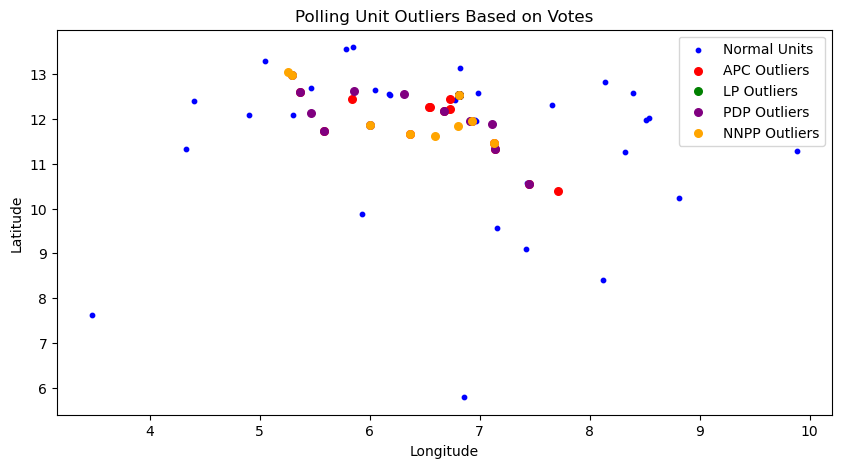

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.scatter(data['Longitude'],data['Latitude'],c='blue',label='Normal Units',s=10)



outliers_APC=data[data['APC_Outlier']]
outliers_LP=data[data['LP_Outlier']]
outliers_PDP=data[data['PDP_Outlier']]
outliers_NNPP=data[data['NNPP_Outlier']]


plt.scatter(outliers_APC['Longitude'],outliers_APC['Latitude'],c='red',label='APC Outliers',s=30)
plt.scatter(outliers_LP['Longitude'],outliers_LP['Latitude'],c='green',label='LP Outliers',s=30)
plt.scatter(outliers_PDP['Longitude'],outliers_PDP['Latitude'],c='purple',label='PDP Outliers',s=30)
plt.scatter(outliers_NNPP['Longitude'],outliers_NNPP['Latitude'],c='orange',label='NNPP Outliers',s=30)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Polling Unit Outliers Based on Votes')

plt.legend()
plt.show()